## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [2]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

NameError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

In [4]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Input , Dropout
from keras.layers import Flatten
from keras.layers import concatenate
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pickle
from keras.layers import LSTM
from keras.preprocessing.text import text_to_word_sequence
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
from keras.layers.normalization import BatchNormalization
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import roc_auc_score
from keras.models import load_model
import tensorflow as tf


In [5]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/9_Donors_choose_DT/preprocessed_data.csv")
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [6]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [7]:
y=data["project_is_approved"].values

In [8]:
data.drop("project_is_approved",axis = 1, inplace = True)

##FOr clean Subcategories

In [9]:

d=[]
data['temp']=data['clean_subcategories'].apply(lambda x: x.split()).apply(lambda x: d+x)

In [10]:
data['temp']

0           [appliedsciences, health_lifescience]
1                                  [specialneeds]
2                                      [literacy]
3                              [earlydevelopment]
4                                      [literacy]
                           ...                   
109243                               [teamsports]
109244                  [earlydevelopment, other]
109245    [appliedsciences, environmentalscience]
109246                       [health_lifescience]
109247             [literacy, literature_writing]
Name: temp, Length: 109248, dtype: object

In [11]:
d=[]
data['clean_subcategories'].apply(lambda x: x.split()).apply(lambda x: d.extend(x))
z=list(set(d))
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(z)

LabelEncoder()

In [12]:
data['clean_subcategories_label']=data['temp'].apply(lambda q:label.transform(q))

In [13]:
data['clean_subcategories_label']

0          [0, 14]
1             [26]
2             [17]
3              [6]
4             [17]
            ...   
109243        [27]
109244     [6, 22]
109245      [0, 8]
109246        [14]
109247    [17, 18]
Name: clean_subcategories_label, Length: 109248, dtype: object

In [14]:
np.max(data['clean_subcategories_label'].apply(lambda x: len(x)))

3

In [15]:
from keras.preprocessing import sequence
max_review_length = 3
clean_subcategories_label_= sequence.pad_sequences(data['clean_subcategories_label'].values, maxlen=max_review_length, padding='post')



In [16]:
import scipy.sparse as sparse
arr = sparse.coo_matrix(clean_subcategories_label_, shape=(109248,3))
data['clean_subcategories_label_'] = arr.toarray().tolist()
print(data)

       school_state  ... clean_subcategories_label_
0                ca  ...                 [0, 14, 0]
1                ut  ...                 [26, 0, 0]
2                ca  ...                 [17, 0, 0]
3                ga  ...                  [6, 0, 0]
4                wa  ...                 [17, 0, 0]
...             ...  ...                        ...
109243           hi  ...                 [27, 0, 0]
109244           nm  ...                 [6, 22, 0]
109245           il  ...                  [0, 8, 0]
109246           hi  ...                 [14, 0, 0]
109247           ca  ...                [17, 18, 0]

[109248 rows x 11 columns]


In [17]:
data.shape

(109248, 11)

In [18]:
data.drop(['temp','clean_subcategories_label'],axis=1,inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.33, stratify=y)



print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(73196, 9) (73196,)
(36052, 9) (36052,)


##Tokenizer

In [20]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 1000000 )
tokenizer.fit_on_texts(X_train["essay"])

In [21]:
X_train['es_tok']  = tokenizer.texts_to_sequences(X_train['essay'].values)

X_test['es_tok']   = tokenizer.texts_to_sequences(X_test['essay'].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
X_test.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,clean_subcategories_label_,es_tok
60249,ga,ms,grades_prek_2,8,literacy_language,literacy,as students walk classroom every day experienc...,63.88,"[17, 0, 0]","[106, 1, 396, 6, 44, 20, 99, 72, 20, 3, 72, 35..."
105342,tn,mrs,grades_prek_2,121,appliedlearning history_civics,earlydevelopment socialsciences,every great dream begins dreamer always rememb...,212.99,"[6, 25, 0]","[44, 90, 890, 2014, 11196, 122, 792, 295, 1136..."
43904,ct,mrs,grades_prek_2,5,appliedlearning,charactereducation earlydevelopment,my students five year olds inner city excited ...,128.61,"[2, 6, 0]","[4, 1, 610, 30, 809, 719, 283, 89, 358, 3, 72,..."
108262,hi,mrs,grades_3_5,9,math_science,mathematics,my students hard working positive learners sch...,411.98,"[19, 0, 0]","[4, 1, 77, 79, 221, 55, 3, 9, 237, 57, 122, 34..."
19282,wa,mrs,grades_prek_2,5,literacy_language,esl literacy,i group 24 incredible hard working 5 year olds...,86.47,"[9, 17, 0]","[2, 60, 1334, 955, 77, 79, 314, 30, 809, 108, ..."


(array([0.03113558, 0.37738401, 0.63805399, 0.80541286, 0.90078693,
        0.9558036 , 0.9848489 , 0.99678944, 0.99969944, 1.        ]),
 array([ 78. , 104.1, 130.2, 156.3, 182.4, 208.5, 234.6, 260.7, 286.8,
        312.9, 339. ]),
 <a list of 1 Patch objects>)

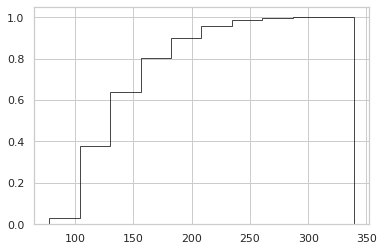

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.hist(X_train['es_tok'].apply(lambda x: len(x)),cumulative=True, density=True,label='CDF', alpha=0.8, color='k',histtype='step')
#np.max(X_train['es_tok'].apply(lambda x: len(x)))

##Percentile length of review which covers almost 98%  is 250, we use Padding of 250

In [24]:
from keras.preprocessing import sequence
max_review_length = 250
X_train_pad = sequence.pad_sequences(X_train['es_tok'].values, maxlen=max_review_length)

X_test_pad  = sequence.pad_sequences(X_test['es_tok'].values, maxlen=max_review_length)

In [25]:
X_train_pad[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [26]:
import pickle
with open('/content/drive/My Drive/9_Donors_choose_DT/glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())

In [27]:
len(tokenizer.word_index.items())

48129

In [28]:
l=tokenizer.word_index.items()
number_of_words_in_corpus = len(tokenizer.word_index)

embedding_matrix = np.zeros((number_of_words_in_corpus+1, 300))
for word, i in l:
  
  
  if word in glove_words:
    embedding_matrix[i] =glove[word]

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data['school_state'].values)


X_train_school_state_label_encoding = label.transform(X_train['school_state'].values)

X_test_school_state_label_encoding = label.transform(X_test['school_state'].values)

In [30]:
data['school_state'].nunique()

51

In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data['teacher_prefix'].values)


X_train_teacher_prefix = label.transform(X_train['teacher_prefix'].values)

X_test_teacher_prefix = label.transform(X_test['teacher_prefix'].values)

In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data['clean_categories'].values)


X_train_clean_categories = label.transform(X_train['clean_categories'].values)

X_test_clean_categories = label.transform(X_test['clean_categories'].values)

In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data['project_grade_category'].values)


X_train_project_grade_category = label.transform(X_train['project_grade_category'].values)

X_test_project_grade_category = label.transform(X_test['project_grade_category'].values)

In [34]:
 
 
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))
 
 
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

In [35]:
 
 
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
 
X_train_teacher_number_of_previously_posted_projects_norm= normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
 
X_train_teacher_number_of_previously_posted_projects_norm=X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
 
X_test_teacher_number_of_previously_posted_projects_norm=X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, Y_train.shape)
#print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, Y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [36]:
X_train_numeric = np.concatenate((X_train_price_norm , X_train_teacher_number_of_previously_posted_projects_norm) , axis = 1)

X_test_numeric= np.concatenate((X_test_price_norm , X_test_teacher_number_of_previously_posted_projects_norm) , axis = 1)

In [37]:
X_train_numeric.shape

(73196, 2)

In [38]:
data['clean_subcategories'].nunique()

401

##Reference:https://stackoverflow.com/questions/57574501/how-to-use-sklearn-auc-in-tensorflow-keras-model-metrics

In [39]:
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.py_function(auc1, (y_true, y_pred), tf.double)


In [40]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard

In [41]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard


essay = Input(shape=(250,), name='essay_input')

X = Embedding(output_dim=300, input_dim=number_of_words_in_corpus+1, input_length=250 , weights=[embedding_matrix],trainable=False)(essay)
lstm_essay = LSTM(200,recurrent_dropout=0.5,return_sequences=True)(X)
flatten_1 = Flatten()(lstm_essay)



school_state = Input(shape=(1,), name='school_state')
X_school_state = Embedding(output_dim=int(np.sqrt(data['school_state'].nunique())) , input_dim=data['school_state'].nunique(), input_length=1)(school_state)
flatten_2 = Flatten()(X_school_state)



teacher_prefix = Input(shape=(1,), name='teacher_prefix')
X_teacher_prefix = Embedding(output_dim=int(np.sqrt(data['teacher_prefix'].nunique())) , input_dim=data['teacher_prefix'].nunique(), input_length=1)(teacher_prefix)
flatten_3 = Flatten()(X_teacher_prefix)



clean_categories = Input(shape=(1,), name='clean_categories')
X_clean_categories = Embedding(output_dim=int(np.sqrt(data['clean_categories'].nunique())), input_dim=data['clean_categories'].nunique(), input_length=1)(clean_categories)
flatten_4 = Flatten()(X_clean_categories)



clean_subcategories = Input(shape=(3,), name='clean_subcategories')
X_clean_subcategories = Embedding(output_dim=int(np.sqrt(data['clean_subcategories'].nunique())), input_dim=data['clean_subcategories'].nunique(), input_length=3)(clean_subcategories)
flatten_5 = Flatten()(X_clean_subcategories)




project_grade_category = Input(shape=(1,), name='project_grade_category')
X_project_grade_category = Embedding(output_dim=int(np.sqrt(data['project_grade_category'].nunique())), input_dim=data['project_grade_category'].nunique(), input_length=1)(project_grade_category)
flatten_6 = Flatten()(X_project_grade_category)


numeric_features = Input(shape=(2,) , name="numerical_features")
numeric_dense = Dense(128, activation='relu' , kernel_initializer='he_normal')(numeric_features)


X_concat = concatenate([flatten_1 , flatten_2 , flatten_3 ,flatten_4 , flatten_5 , flatten_6 , numeric_dense])
model = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=regularizers.l2(0.001))(X_concat)

model = Dropout(0.5)(model)

model = Dense(200,activation="relu",kernel_initializer="glorot_normal")(model)

model = BatchNormalization()(model)

model = Dropout(0.5)(model)

model = Dense(80,activation="relu", kernel_initializer="glorot_normal" )(model)


output = Dense(2, activation='softmax', name='output')(model)

model_1 = Model(inputs=[essay, school_state ,teacher_prefix,clean_categories,
                       clean_subcategories ,project_grade_category ,numeric_features ],outputs=[output])



print(model_1.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 250, 300)     14439000    essay_input[0][0]                
__________________________________________________________________________________________________
school_state (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     [(None, 1)]          0                                            
_______________________________________________________________________________________

In [42]:
train = [X_train_pad,X_train_school_state_label_encoding.reshape(-1,1),X_train_teacher_prefix.reshape(-1,1),X_train_clean_categories.reshape(-1,1),np.array(X_train['clean_subcategories_label_'].to_list()),X_train_project_grade_category.reshape(-1,1),X_train_numeric]

test = [X_test_pad,X_test_school_state_label_encoding.reshape(-1,1),X_test_teacher_prefix.reshape(-1,1),X_test_clean_categories.reshape(-1,1),np.array(X_test['clean_subcategories_label_'].to_list()),X_test_project_grade_category.reshape(-1,1),X_test_numeric]


In [43]:
X_train_pad.shape

(73196, 250)

In [44]:
X_train_school_state_label_encoding.reshape(-1,1).shape

(73196, 1)

In [45]:
X_train_teacher_prefix.reshape(-1,1).shape

(73196, 1)

In [46]:
np.array(X_train['clean_subcategories_label_'].to_list()).shape

(73196, 3)

In [47]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train, 2) 
y_test = np_utils.to_categorical(Y_test, 2)

In [48]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [49]:
import numpy as np
import tensorflow as tf
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,roc_auc_score
class Metrics(tf.keras.callbacks.Callback):
  def __init__(self, validation_data=None,validation_target=None):
    super(Metrics, self).__init__()
    self.validation_data = validation_data
    self.validation_target=validation_target
    # best_weights to store the weights at which the minimum loss occurs.
    
  def on_train_begin(self, logs={}):
    self.val_f1s=[]
    self.val_auc=[]
  
  def on_epoch_end(self, epoch, logs={}):
    

    val_predict =np.array((self.model.predict(self.validation_data)))
    val_targ = np.array(self.validation_target,dtype=int)
    #_val_f1 = f1_score(val_targ, val_predict)
    _val_auc=roc_auc_score(val_targ[:,0], val_predict[:,0],average='macro')
   # self.val_f1s.append(_val_f1)
    #self.val_auc.append(_val_auc)
    print(' -val_auc_score: '+str(_val_auc))



In [50]:
#Input layer
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
checkpoint1 = ModelCheckpoint("model_1.h5",
                              
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)
earlystop1 = EarlyStopping(monitor = 'val_loss',
                            mode="auto",
                            min_delta = 0, 
                            patience = 4,
                            verbose = 2)

log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

metric=Metrics(test, y_test)

callbacks_1= [checkpoint1,earlystop1,tensorboard_callback]

In [51]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
history1 = model_1.fit(train, y_train, batch_size=512, epochs=10, verbose=1,callbacks=callbacks_1, validation_data=(test, y_test))

Epoch 1/10
  1/143 [..............................] - ETA: 0s - loss: 2.5252 - auroc: 0.4815WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
143/143 [==============================] - ETA: 0s - loss: 0.9859 - auroc: 0.5491
Epoch 00001: val_loss improved from inf to 0.59027, saving model to model_1.h5
143/143 [==============================] - 142s 991ms/step - loss: 0.9859 - auroc: 0.5491 - val_loss: 0.5903 - val_auroc: 0.6661
Epoch 2/10
143/143 [==============================] - ETA: 0s - loss: 0.5503 - auroc: 0.6541
Epoch 00002: val_loss improved from 0.59027 to 0.49614, saving model to model_1.h5
143/143 [==============================] - 135s 942ms/step - loss: 0.5503 - auroc: 0.6541 - val_loss: 0.4961 - val_auroc: 0.7167
Epoch 3/10
143/143 [===============

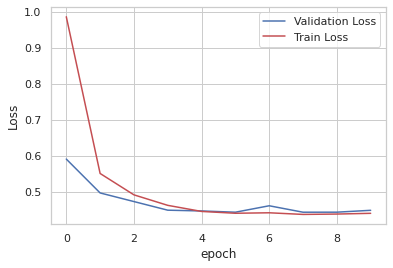

In [52]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Loss')
x = list(range(0,10))
vy = history1.history['val_loss']
ty = history1.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()


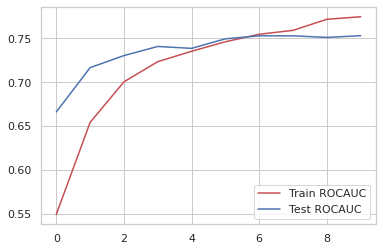

In [53]:
plt.plot(history1.history['auroc'], 'r')
plt.plot(history1.history['val_auroc'], 'b')
plt.legend({'Train ROCAUC': 'r', 'Test ROCAUC':'b'})
plt.show()

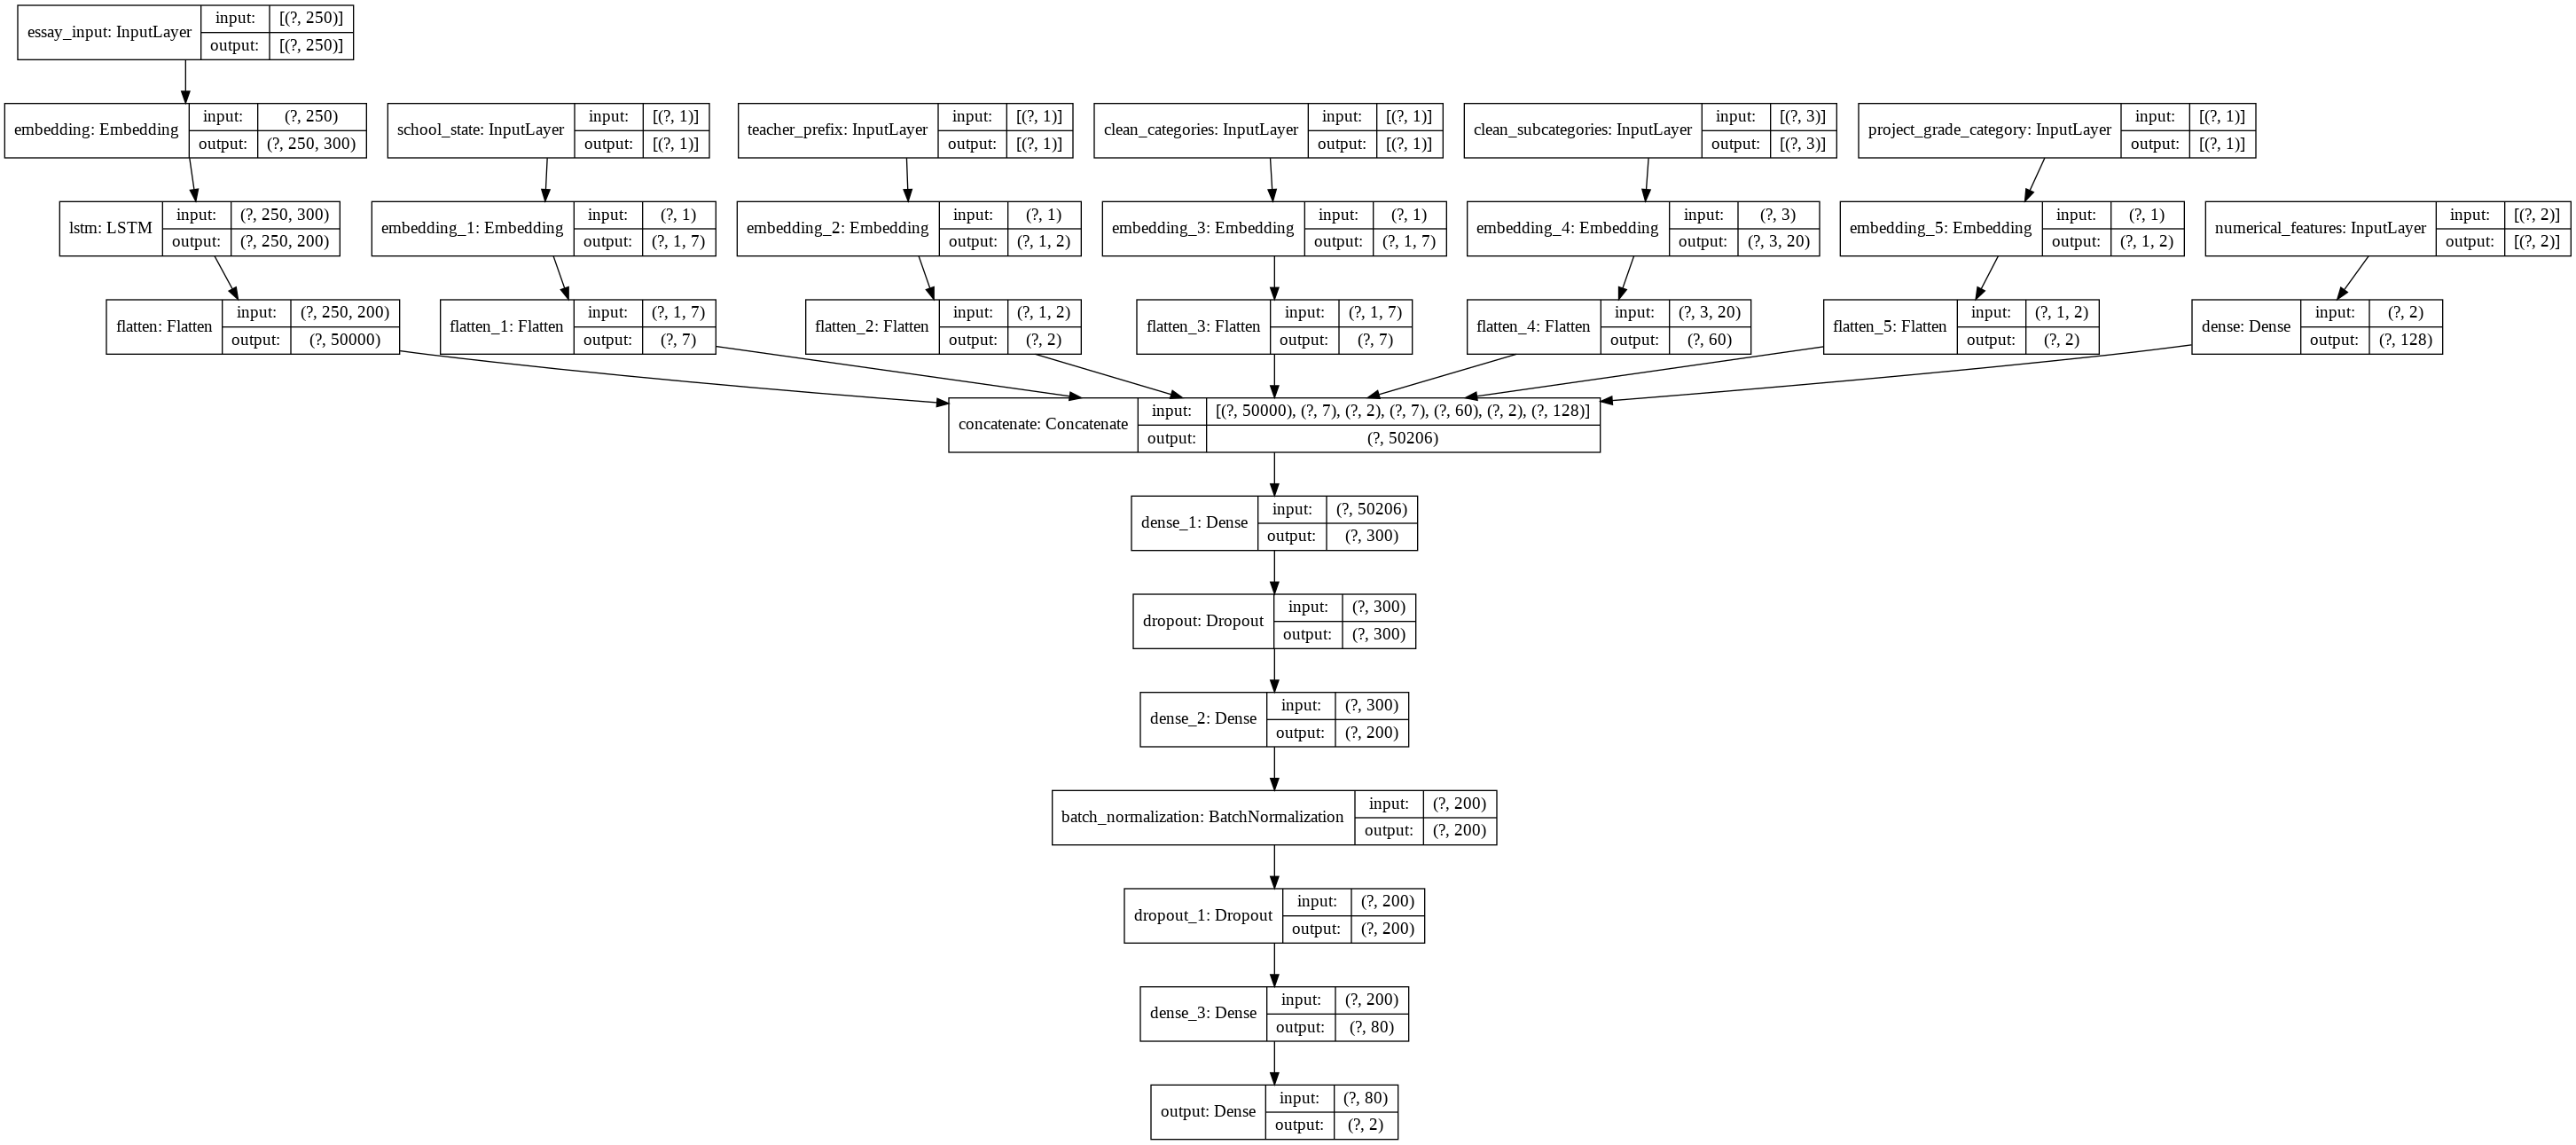

In [54]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model_1, to_file=dot_img_file, show_shapes=True)

##Model_2

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [55]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_train["essay"])

<73196x48093 sparse matrix of type '<class 'numpy.float64'>'
	with 7908625 stored elements in Compressed Sparse Row format>

##Depends upon idf percentile value, we are going to take specific words

In [56]:
arr=vectorizer.idf_
print("10th percentile of arr : ", 
       np.percentile(arr, 10))
print("40th percentile of arr : ", 
       np.percentile(arr, 40))
print("50th percentile of arr : ", 
       np.percentile(arr, 50))
print("25th percentile of arr : ",
       np.percentile(arr, 25))
print("75th percentile of arr : ",
       np.percentile(arr, 75))
print("90th percentile of arr : ",
       np.percentile(arr, 90))
print("95th percentile of arr : ",
       np.percentile(arr, 95))
print("98th percentile of arr : ",
       np.percentile(arr, 98))
print("99th percentile of arr : ",
       np.percentile(arr, 99))

10th percentile of arr :  7.473521896790654
40th percentile of arr :  10.591471803068893
50th percentile of arr :  11.102297426834886
25th percentile of arr :  9.492859514400784
75th percentile of arr :  11.50776253494305
90th percentile of arr :  11.507762534943051
95th percentile of arr :  11.50776253494305
98th percentile of arr :  11.50776253494305
99th percentile of arr :  11.50776253494305


In [57]:
mid_idf=[str(i) for i,j in zip(vectorizer.get_feature_names() ,vectorizer.idf_) if j>2 and j<11.5]

In [58]:
len(set(mid_idf))

29389

In [59]:
tokenizer = Tokenizer(num_words= 100000 )
tokenizer.fit_on_texts(mid_idf)

X_train['essay_tok_mid']  = tokenizer.texts_to_sequences(X_train['essay'].values)

X_test['essay_tok_mid']   = tokenizer.texts_to_sequences(X_test['essay'].values)

(array([0.00885294, 0.29154599, 0.62286191, 0.8147713 , 0.91685338,
        0.96917864, 0.99147494, 0.99866113, 0.99986338, 1.        ]),
 array([ 43. ,  68.1,  93.2, 118.3, 143.4, 168.5, 193.6, 218.7, 243.8,
        268.9, 294. ]),
 <a list of 1 Patch objects>)

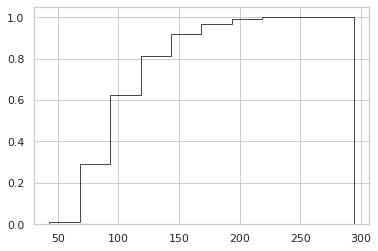

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.hist(X_train['essay_tok_mid'].apply(lambda x: len(x)),cumulative=True, density=True,label='CDF', alpha=0.8, color='k',histtype='step')
#np.max(X_train['es_tok'].apply(lambda x: len(x)))

In [101]:
from keras.preprocessing import sequence
max_review_length = 200
X_train_pad1 = sequence.pad_sequences(X_train['essay_tok_mid'].values, maxlen=max_review_length)

X_test_pad1  = sequence.pad_sequences(X_test['essay_tok_mid'].values, maxlen=max_review_length)

In [62]:
X_train_pad1.shape

(73196, 200)

In [117]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.regularizers import l2
from keras.layers import Flatten
from keras.layers import Dense, Input , Dropout
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard


essay1 = Input(shape=(200,), name='essay_input1')

X = Embedding(len(mid_idf)+1,300,input_length=200,trainable=True)(essay1)
lstm_essay = LSTM(100,recurrent_dropout=0.5,return_sequences=True,kernel_regularizer=regularizers.l2(0.001))(X)
flatten_1_mid = Flatten()(lstm_essay)



school_state1 = Input(shape=(1,), name='school_state1')
X_school_state = Embedding(output_dim=int(np.sqrt(data['school_state'].nunique())) , input_dim=data['school_state'].nunique(), input_length=1)(school_state1)
flatten_2 = Flatten()(X_school_state)



teacher_prefix1 = Input(shape=(1,), name='teacher_prefix1')
X_teacher_prefix = Embedding(output_dim=int(np.sqrt(data['teacher_prefix'].nunique())) , input_dim=data['teacher_prefix'].nunique(), input_length=1)(teacher_prefix1)
flatten_3 = Flatten()(X_teacher_prefix)



clean_categories1 = Input(shape=(1,), name='clean_categories1')
X_clean_categories = Embedding(output_dim=int(np.sqrt(data['clean_categories'].nunique())), input_dim=data['clean_categories'].nunique(), input_length=1)(clean_categories1)
flatten_4 = Flatten()(X_clean_categories)



clean_subcategories1 = Input(shape=(3,), name='clean_subcategories1')
X_clean_subcategories = Embedding(output_dim=int(np.sqrt(data['clean_subcategories'].nunique())), input_dim=data['clean_subcategories'].nunique(), input_length=3)(clean_subcategories1)
flatten_5 = Flatten()(X_clean_subcategories)




project_grade_category1 = Input(shape=(1,), name='project_grade_category1')
X_project_grade_category = Embedding(output_dim=int(np.sqrt(data['project_grade_category'].nunique())), input_dim=data['project_grade_category'].nunique(), input_length=1)(project_grade_category1)
flatten_6 = Flatten()(X_project_grade_category)


numeric_features1 = Input(shape=(2,) , name="numerical_features1")
numeric_dense = Dense(128, activation='relu' , kernel_initializer='he_normal')(numeric_features1)


X_concat = concatenate([flatten_1_mid , flatten_2 , flatten_3 ,flatten_4 , flatten_5 , flatten_6 , numeric_dense])
model = Dense(50, activation="relu", kernel_initializer="he_normal")(X_concat)

model = Dropout(0.5)(model)

model = Dense(100,activation="relu",kernel_initializer="glorot_normal")(model)

model = BatchNormalization()(model)

model = Dropout(0.5)(model)

model = Dense(80,activation="sigmoid", kernel_initializer="glorot_normal")(model)


output1 = Dense(2, activation='softmax', name='output1')(model)

model_2 = Model(inputs=[essay1, school_state1 ,teacher_prefix1,clean_categories1,
                       clean_subcategories1 ,project_grade_category1 ,numeric_features1 ],outputs=[output1])



print(model_2.summary())

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input1 (InputLayer)       [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_57 (Embedding)        (None, 200, 300)     8817000     essay_input1[0][0]               
__________________________________________________________________________________________________
school_state1 (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix1 (InputLayer)    [(None, 1)]          0                                            
______________________________________________________________________________________

In [103]:
train = [X_train_pad1,X_train_school_state_label_encoding.reshape(-1,1),X_train_teacher_prefix.reshape(-1,1),X_train_clean_categories.reshape(-1,1),np.array(X_train['clean_subcategories_label_'].to_list()),X_train_project_grade_category.reshape(-1,1),X_train_numeric]

test = [X_test_pad1,X_test_school_state_label_encoding.reshape(-1,1),X_test_teacher_prefix.reshape(-1,1),X_test_clean_categories.reshape(-1,1),np.array(X_test['clean_subcategories_label_'].to_list()),X_test_project_grade_category.reshape(-1,1),X_test_numeric]


In [104]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train, 2) 
y_test = np_utils.to_categorical(Y_test, 2)

In [66]:
y_test.shape

(36052, 2)

In [118]:
#Input layer
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
checkpoint1 = ModelCheckpoint("model_2.h5",
                              
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)
earlystop1 = EarlyStopping(monitor = 'val_loss',
                            mode="auto",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 2)

log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
metric=Metrics(test, y_test)


callbacks_2= [checkpoint1,earlystop1,tensorboard_callback]

In [119]:
model_2.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=[auroc])
history = model_2.fit(train, y_train, batch_size=600, epochs=10, verbose=1,callbacks=callbacks_2, validation_data=(test, y_test))

Epoch 1/10
122/122 [==============================] - ETA: 0s - loss: 0.5081 - auroc: 0.6630
Epoch 00001: val_loss improved from inf to 0.41136, saving model to model_2.h5
122/122 [==============================] - 120s 982ms/step - loss: 0.5081 - auroc: 0.6630 - val_loss: 0.4114 - val_auroc: 0.7315
Epoch 2/10
122/122 [==============================] - ETA: 0s - loss: 0.3727 - auroc: 0.7649
Epoch 00002: val_loss improved from 0.41136 to 0.38823, saving model to model_2.h5
122/122 [==============================] - 116s 954ms/step - loss: 0.3727 - auroc: 0.7649 - val_loss: 0.3882 - val_auroc: 0.7314
Epoch 3/10
122/122 [==============================] - ETA: 0s - loss: 0.3467 - auroc: 0.7978
Epoch 00003: val_loss did not improve from 0.38823
122/122 [==============================] - 115s 945ms/step - loss: 0.3467 - auroc: 0.7978 - val_loss: 0.3943 - val_auroc: 0.7268
Epoch 4/10
122/122 [==============================] - ETA: 0s - loss: 0.3231 - auroc: 0.8293
Epoch 00004: val_loss did no

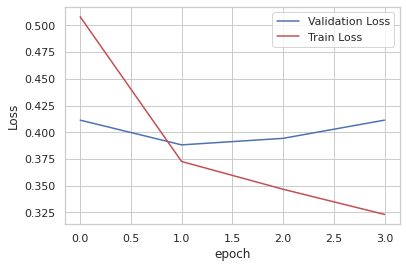

In [120]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Loss')
x = list(range(0,4))
vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()


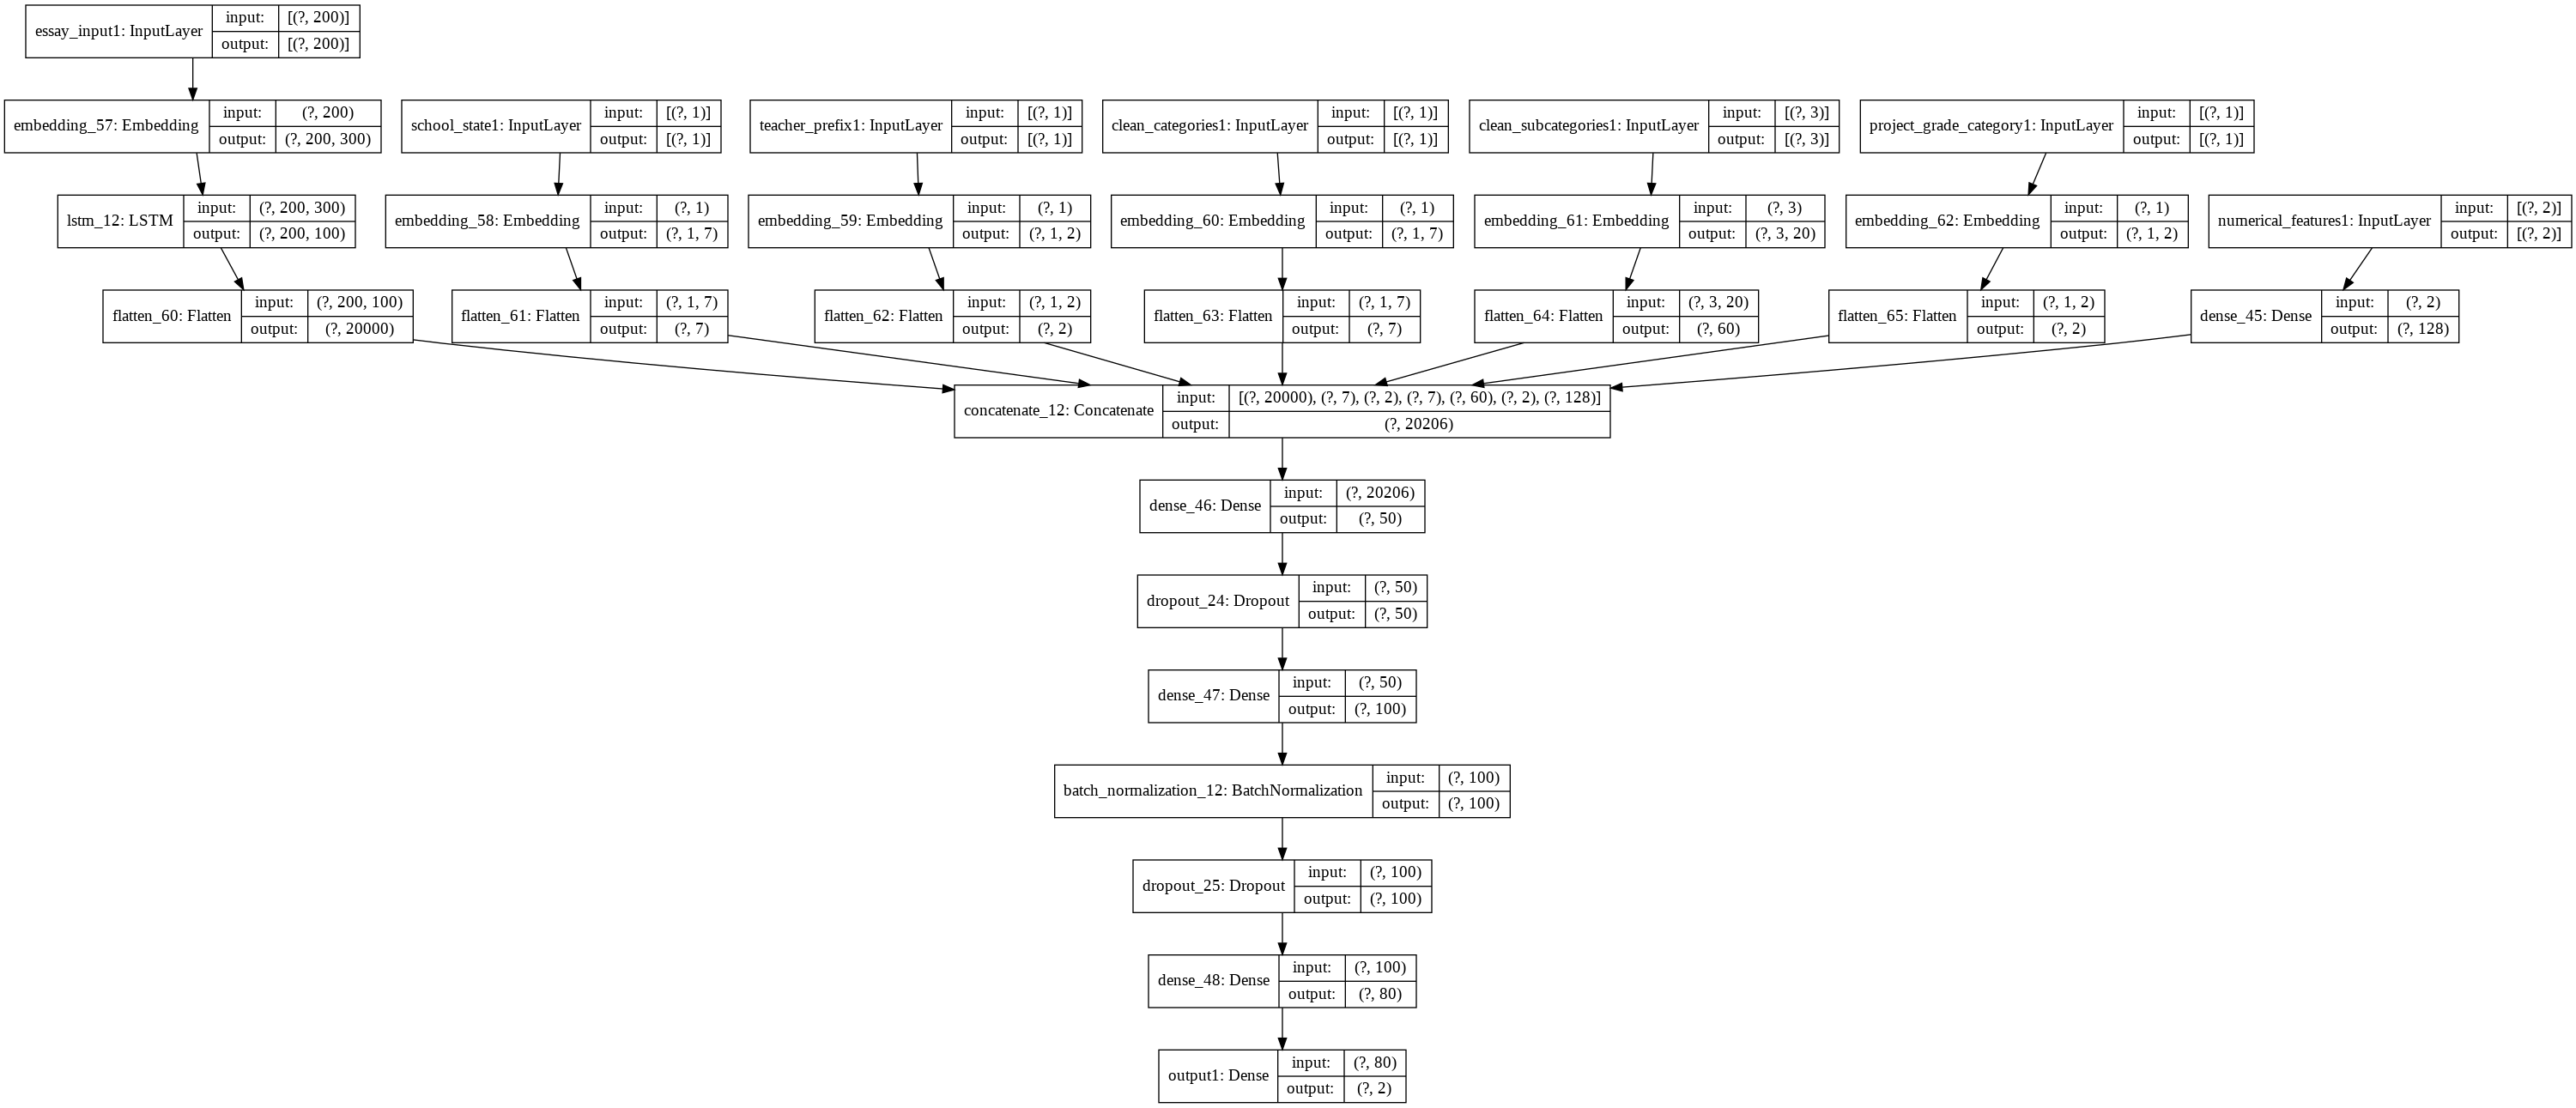

In [121]:
dot_img_file = '/tmp/model_2.png'
tf.keras.utils.plot_model(model_2, to_file=dot_img_file, show_shapes=True)

##Model_3

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [73]:
from keras.layers import Conv1D
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
x_train_state_one_hot = vectorizer.transform(X_train['school_state'].values)
x_test_state_one_hot = vectorizer.transform(X_test['school_state'].values)



print(x_train_state_one_hot.shape, y_train.shape)
print(x_test_state_one_hot.shape, y_test.shape)

(73196, 51) (73196, 2)
(36052, 51) (36052, 2)


In [75]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

x_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
x_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)





print(x_train_categories_one_hot.shape, y_train.shape)
print(x_test_categories_one_hot.shape, y_test.shape)

(73196, 9) (73196, 2)
(36052, 9) (36052, 2)


In [76]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

x_train_subcategories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
x_test_subcategories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)


print(x_train_subcategories_one_hot.shape, y_train.shape)
print(x_test_subcategories_one_hot.shape, y_test.shape)

(73196, 30) (73196, 2)
(36052, 30) (36052, 2)


In [77]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
x_train_teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
x_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)

print(x_train_teacher_prefix_one_hot.shape, y_train.shape)
print(x_test_teacher_prefix_one_hot.shape, y_test.shape)

(73196, 5) (73196, 2)
(36052, 5) (36052, 2)


In [78]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
x_train_project_grade_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
x_test_project_grade_one_hot = vectorizer.transform(X_test['project_grade_category'].values)

print(x_train_project_grade_one_hot.shape, y_train.shape)
print(x_test_project_grade_one_hot.shape, y_test.shape)

(73196, 4) (73196, 2)
(36052, 4) (36052, 2)


In [79]:
from scipy.sparse import hstack

In [80]:
train_features_wot= hstack((x_train_project_grade_one_hot,x_train_teacher_prefix_one_hot,x_train_categories_one_hot,x_train_subcategories_one_hot,x_train_state_one_hot,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).todense()
test_features_wot = hstack((x_test_project_grade_one_hot,x_test_teacher_prefix_one_hot,x_test_categories_one_hot,x_test_subcategories_one_hot,x_test_state_one_hot,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).todense()

In [81]:
rest_train = np.expand_dims(train_features_wot,2)
rest_test = np.expand_dims(test_features_wot,2)

In [82]:
print("train data shape",rest_train.shape)
print("test data shape",rest_test.shape)

train data shape (73196, 101, 1)
test data shape (36052, 101, 1)


In [83]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words= 1000000 )
tokenizer.fit_on_texts(X_train["essay"])

In [84]:
X_train['es_tok']  = tokenizer.texts_to_sequences(X_train['essay'].values)

X_test['es_tok']   = tokenizer.texts_to_sequences(X_test['essay'].values)

In [85]:
l=tokenizer.word_index.items()
number_of_words_in_corpus = len(tokenizer.word_index)

embedding_matrix = np.zeros((number_of_words_in_corpus+1, 300))
for word, i in l:
  
  
  if word in glove_words:
    embedding_matrix[i] =glove[word]

In [86]:
from keras.preprocessing import sequence
max_review_length = 250
X_train_pad = sequence.pad_sequences(X_train['es_tok'].values, maxlen=max_review_length)

X_test_pad  = sequence.pad_sequences(X_test['es_tok'].values, maxlen=max_review_length)

In [93]:
from keras.layers import Conv1D
from keras.initializers import he_normal



essay = Input(shape=(250,))

X = Embedding(output_dim=300, input_dim=number_of_words_in_corpus+1, input_length=300 , weights=[embedding_matrix],trainable=False)(essay)
lstm_essay = LSTM(200,recurrent_dropout=0.5,return_sequences=True)(X)
flatten_1 = Flatten()(lstm_essay)





input_wot  = Input(shape=(101,1))

con = Conv1D(300 , 3 , activation='relu' ,  kernel_initializer=he_normal(seed=10) , padding='valid')(input_wot)

convo = Conv1D(150 , 3 , activation='relu' ,  kernel_initializer=he_normal(seed=0) , padding='valid')(con)

flatten_2 = Flatten()(convo)



x_concat = concatenate([flatten_1  , flatten_2])

x = Dense(120, activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001) )(x_concat)

x=Dropout(0.5)(x)

x = Dense(200,activation="sigmoid",kernel_initializer="glorot_normal",kernel_regularizer=regularizers.l2(0.001) )(x)

x = BatchNormalization()(x)

x=Dropout(0.5)(x)

x = Dense(75,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)



output = Dense(2, activation='softmax', name='output')(x)

model_3= Model(inputs=[essay, input_wot],outputs=[output])



print(model_3.summary())

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 101, 1)]     0                                            
__________________________________________________________________________________________________
embedding_26 (Embedding)        (None, 250, 300)     14439000    input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 99, 300)      1200        input_6[0][0]                    
______________________________________________________________________________________

In [88]:
train = [X_train_pad,rest_train]
test = [X_test_pad,rest_test]

In [89]:
#Input layer
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
checkpoint1 = ModelCheckpoint("model_3.h5",
                              
                             monitor="val_loss",
                             mode="auto",
                             save_best_only = True,
                             verbose=1)
earlystop1 = EarlyStopping(monitor = 'val_loss',
                            mode="auto",
                            min_delta = 0, 
                            patience = 4,
                            verbose = 2)

log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
metric=Metrics(test, y_test)


callbacks_2= [checkpoint1,earlystop1,tensorboard_callback]

In [95]:
model_3.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=[auroc])
history2= model_3.fit(train, y_train, batch_size=600, epochs=20, verbose=2,callbacks=callbacks_2, validation_data=(test, y_test))

Epoch 1/20

Epoch 00001: val_loss did not improve from 0.42303
122/122 - 130s - loss: 0.7631 - auroc: 0.6179 - val_loss: 0.7736 - val_auroc: 0.6781
Epoch 2/20

Epoch 00002: val_loss did not improve from 0.42303
122/122 - 125s - loss: 0.5909 - auroc: 0.7054 - val_loss: 0.6728 - val_auroc: 0.7203
Epoch 3/20

Epoch 00003: val_loss did not improve from 0.42303
122/122 - 125s - loss: 0.5236 - auroc: 0.7301 - val_loss: 0.6177 - val_auroc: 0.7386
Epoch 4/20

Epoch 00004: val_loss did not improve from 0.42303
122/122 - 125s - loss: 0.4835 - auroc: 0.7497 - val_loss: 0.5959 - val_auroc: 0.7504
Epoch 5/20

Epoch 00005: val_loss did not improve from 0.42303
122/122 - 125s - loss: 0.4563 - auroc: 0.7615 - val_loss: 0.5511 - val_auroc: 0.7518
Epoch 6/20

Epoch 00006: val_loss did not improve from 0.42303
122/122 - 125s - loss: 0.4412 - auroc: 0.7697 - val_loss: 0.5459 - val_auroc: 0.7506
Epoch 7/20

Epoch 00007: val_loss did not improve from 0.42303
122/122 - 126s - loss: 0.4291 - auroc: 0.7849 - v

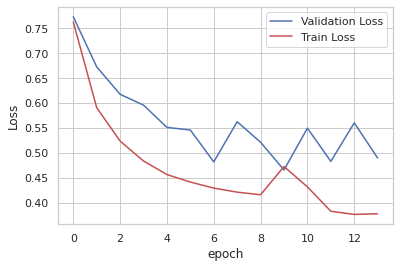

In [97]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Loss')
x = list(range(0,14))
vy = history2.history['val_loss']
ty = history2.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()


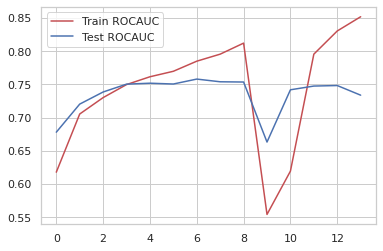

In [99]:
plt.plot(history2.history['auroc'], 'r')
plt.plot(history2.history['val_auroc'], 'b')
plt.legend({'Train ROCAUC': 'r', 'Test ROCAUC':'b'})
plt.show()

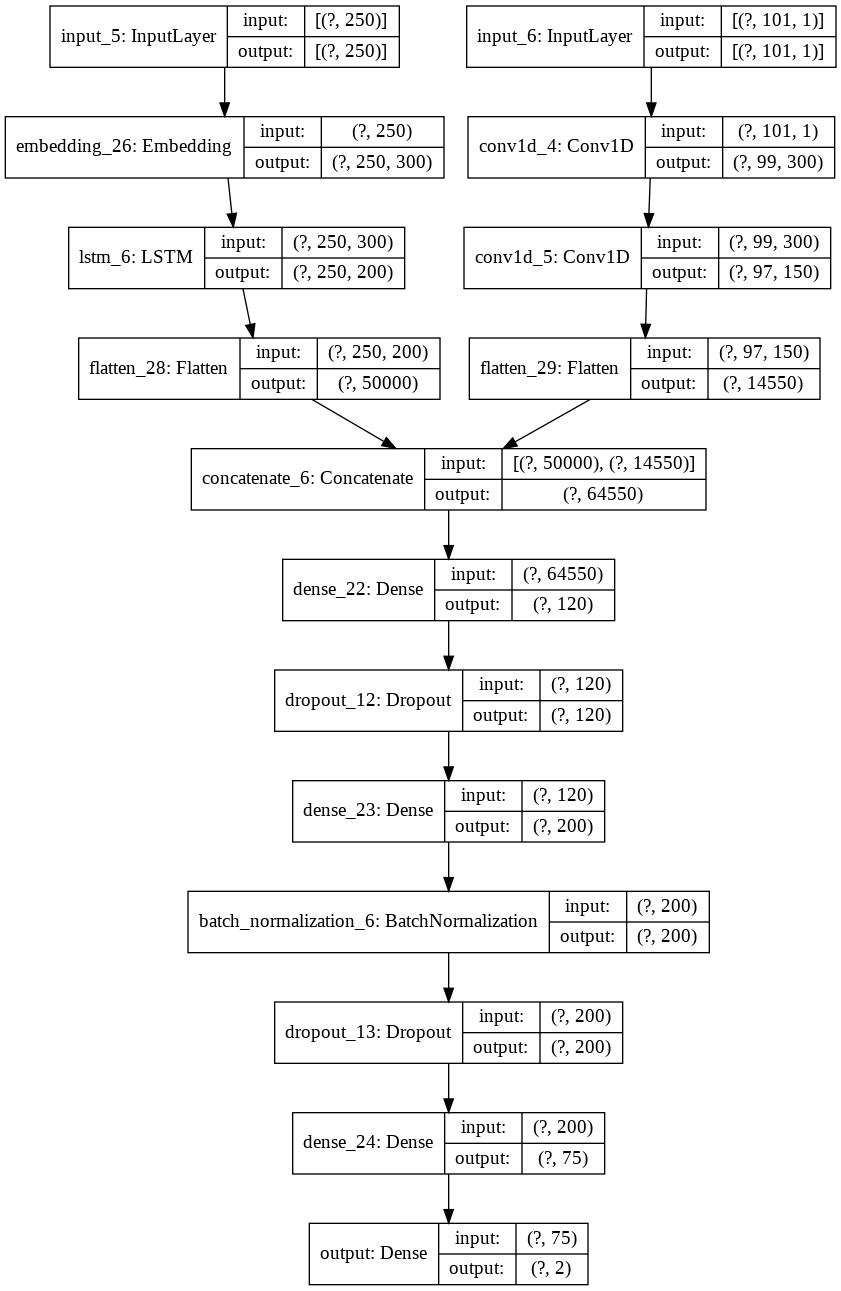

In [100]:
dot_img_file = '/tmp/model_3.png'
tf.keras.utils.plot_model(model_3, to_file=dot_img_file, show_shapes=True)